In [37]:
import pandas as pd
import numpy as np
import os
import geopandas as gpd
import fiona
import math
from matplotlib import colors
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [11]:
version='v16_250104'
output_dir = os.path.join(r'J:\lakemapping\postprocess',version)
auxiliary_dataset_gdb=r'J:\lakemapping\auxiliary_dataset.gdb'
merge_gdb=os.path.join(output_dir,f'5_polygon_afm_mergeWith_GLAKES_PLD.gdb')
output_c_csv_dir=os.path.join(output_dir,f'5_GLAKES_plus_csv')
os.makedirs(output_c_csv_dir,exist_ok=True)
# eight_continents=['Asia','Siberia','Africa','Europe','Oceania_Anta','North_America','Arctic','South_America']
eight_continents=['Asia','Siberia','Africa','Europe','Oceania','North_America','Arctic','South_America']
fig_path=r'D:\lakemapping\10_paper_writting\figure\v5_250213'

In [50]:
plt.rcParams['axes.unicode_minus']=False#负号
plt.rcParams['font.sans-serif']=['Arial']###############
plt.rcParams['font.size'] = '7' # 设置字体大小 = '16' # 设置字体大小
# plt.rcParams["font.weight"] = "bold"
# plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams['xtick.direction'] = 'in'#将x周的刻度线方向设置向内
plt.rcParams['ytick.direction'] = 'in'#将y轴的刻度方向设置向内

In [3]:
layers = fiona.listlayers(merge_gdb)
desired_columns = ['lake_area'] 
print(layers)
for layer in layers:
    if layer.startswith('c5'):
        print(f"正在处理图层: {layer}")
        gdf = gpd.read_file(merge_gdb, layer=layer)
        filtered_gdf = gdf[desired_columns]
        output_file = os.path.join(output_c_csv_dir, f"{layer}.csv")
        filtered_gdf.to_csv(output_file, index=False)
        print(f"图层 {layer} 已保存为 {output_file}")

['c1_Asia_lakes', 'c2_Siberia_lakes', 'c3_Africa_lakes', 'c4_Europe_lakes', 'c5_Oceania_lakes', 'c6_North_America_lakes', 'c7_Arctic_lakes', 'c8_South_America_lakes', 'c9_Anta_lakes']
正在处理图层: c5_Oceania_lakes
图层 c5_Oceania_lakes 已保存为 J:\lakemapping\postprocess\v16_250104\5_GLAKES_plus_csv\c5_Oceania_lakes.csv


In [7]:
# 定义湖泊面积的bins（区间）
poww=range(-3,7)
bins = [10**i for i in poww]
print(bins)
bin_labels = bins[1:]
print(bin_labels)
results = pd.DataFrame(columns=eight_continents)
out_csv=os.path.join(output_c_csv_dir, f"continent_area_distribution_10.csv")
for i in range(8):
    continent = eight_continents[i]
    region_file=os.path.join(output_c_csv_dir,f'c{i+1}_{continent}_lakes.csv')
    df = pd.read_csv(region_file)
    area_binned = pd.cut(df[desired_columns].squeeze(), bins=bins, labels=bin_labels, right=False)
    area_sum_by_bin = df.groupby(area_binned)[desired_columns].sum()
    results[continent] = area_sum_by_bin.reindex(bin_labels, fill_value=0)

# 将结果保存为 CSV 文件
results.to_csv(out_csv)

[0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]
[0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]


In [8]:
poww=range(-3,7)
bins = [10**i for i in poww]
print(bins)
bin_labels = bins[1:]
print(bin_labels)
results = pd.DataFrame(columns=eight_continents)
out_csv=os.path.join(output_c_csv_dir, f"continent_count_distribution_10_2.csv")
for i in range(8):
    continent = eight_continents[i]
    region_file=os.path.join(output_c_csv_dir,f'c{i+1}_{continent}_lakes.csv')
    df = pd.read_csv(region_file)
    area_binned = pd.cut(df[desired_columns].squeeze(), bins=bins, labels=bin_labels, right=False)
    area_sum_by_bin = df.groupby(area_binned)[desired_columns].count()
    results[continent] = area_sum_by_bin.reindex(bin_labels, fill_value=0)

# 将结果保存为 CSV 文件
results.to_csv(out_csv)

[0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]
[0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]


In [15]:
region_file

'J:\\lakemapping\\postprocess\\v16_250104\\5_GLAKES_plus_csv\\c1_Asia_lakes.csv'

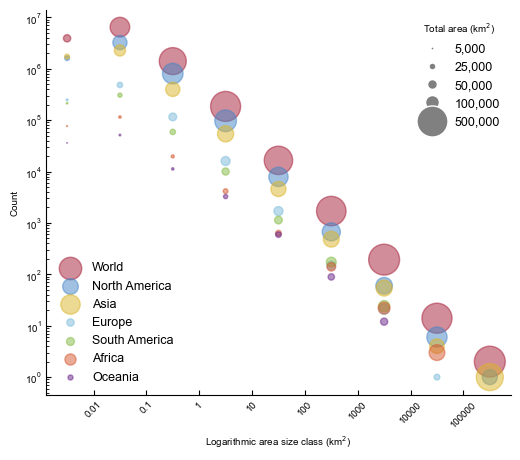

In [51]:
savepic=os.path.join(fig_path,'3-1 total count of lakes across decadal area size.png')
data_dir=r'D:\lakemapping\10_paper_writting\figure'
color_list=['#a51c36','#4485c7','#dbb428','#7abbdb','#84ba42','#d4562e','#682487']
# 读取 Excel 文件中的两个 sheet
file_path = os.path.join(data_dir,'dataset_distribution.xlsx')
area_df = pd.read_excel(file_path, sheet_name='continent_area')
quantity_df = pd.read_excel(file_path, sheet_name='continent_count')

# 假设行是不同的尺寸，列是不同的系列
# 获取行和列
sizes = area_df.index  # 尺寸是索引
series = area_df.columns  # 系列是列

# 创建一个散点图
fig, ax = plt.subplots(figsize=(6, 5))

# fig=plt.figure(figsize=(6,4),dpi=300)#fig=plt.figure(figsize=(18,7.9))
# gs = gridspec.GridSpec(2,2,width_ratios=[2,1],height_ratios=[1,1],wspace =0.2,hspace =0.01)
# ax=plt.subplot(gs[:, 0])

# 初始化两个图例
series_legend = []
size_legend = []

i=0
# 遍历每个系列，绘制散点图
for series_name in series[1:]:
    # 获取该系列的面积和数量数据
    area = area_df[series_name]
    quantity = quantity_df[series_name]
    # 使用面积来控制散点的大小
    scatter = ax.scatter(sizes, quantity, s= area/10**3, label=series_name,color=color_list[i],alpha=0.5)
    # 图例：系列
    series_legend.append(scatter)
    i=i+1
    
area_size=[5000,25000,50000,100000,500000]
area_size_label=[f'{area:,}' for area in area_size]
for area in area_size:
    marker_color = colors.to_rgba('gray', alpha=1)
    size_legend.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=marker_color, markersize=math.sqrt(area/10**3)))

# 设置图表标题和标签
ax.set_xlabel('Logarithmic area size class (km$^2$)')
ax.set_yscale('log')
ax.set_ylabel('Count')
ax.set_xticks(np.arange(0.5,8.5,1))
ax.set_xticklabels(bins[1:-1],rotation=45) 

# 添加图例
le=ax.legend(handles=size_legend, labels=area_size_label, title='Total area (km$^2$)', loc='upper right', fontsize=9, frameon=False)#,loc=(0.3, 0.02)
ax.legend(handles=series_legend, title=None, loc='lower left', fontsize=9, frameon=False)
plt.gca().add_artist(le)
# 计算每个系列的总面积和总数量
totals = pd.DataFrame({
    'Total Area': area_df.sum(),
    'Total Quantity': quantity_df.sum()
})
totals = totals.applymap(lambda x: f'{x:.0f}')
table_data = totals.iloc[1:, :].reset_index()
# 创建一个表格来显示这些信息
table_data.columns = ['Region', 'Total area (km$^2$)', 'Total count']

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# area = area_df.sum()
# quantity = quantity_df.sum()
# ax_pie = plt.subplot(gs[0, 1])
# ax_pie.pie(area[2:], labels=area[2:].index, colors=color_list[1:], autopct='%1.1f%%', startangle=140)
# ax_pie.set_xlabel('Total region area')

# 添加表格到图表中
# ax.table(cellText=table_data.values, colLabels=table_data.columns, loc='top', cellLoc='right',fontsize=7, bbox=[0.5, 0.65, 0.5, 0.35])
plt.savefig(savepic,dpi=400,bbox_inches='tight')#,dpi=400
# 显示图表
plt.show()


Text(0.5, 0, 'Total region area')

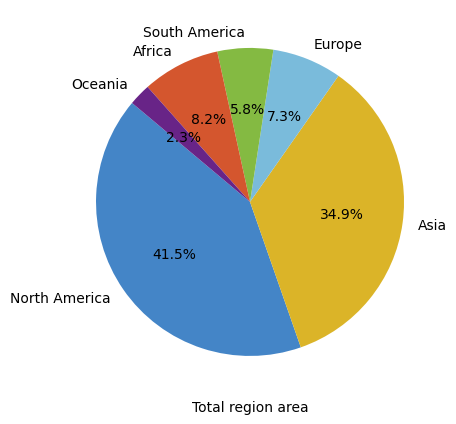

In [35]:
area = area_df.sum()
quantity = quantity_df.sum()
area[2:]
fig, ax_pie = plt.subplots(figsize=(6, 5))
ax_pie.pie(area[2:], labels=area[2:].index, colors=color_list[1:], autopct='%1.1f%%', startangle=140)
ax_pie.set_xlabel('Total region area')

In [48]:
quantity = quantity_df.sum()
quantity

lake_area         1111111.11
World            11961869.00
North America     5743939.00
Asia              4444893.00
Europe             864987.00
South America      589603.00
Africa             215948.00
Oceania            102499.00
dtype: float64

Text(0.5, 0, 'Total region count')

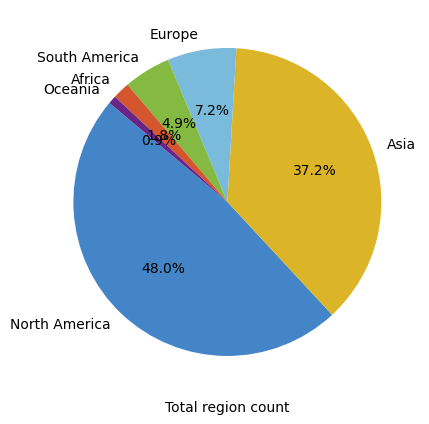

In [49]:
fig, ax_pie = plt.subplots(figsize=(6, 5))
ax_pie.pie(quantity[2:], labels=quantity[2:].index, colors=color_list[1:], autopct='%1.1f%%', startangle=140)
ax_pie.set_xlabel('Total region count')

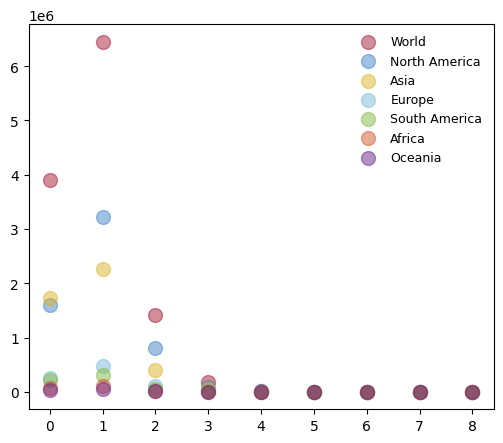

In [29]:
savepic=os.path.join(fig_path,'3-1 legend.png')
fig, ax = plt.subplots(figsize=(6, 5))
series_legend = []
i=0
for series_name in series[1:]:
    # 获取该系列的面积和数量数据
    area = area_df[series_name]
    quantity = quantity_df[series_name]
    
    # 使用面积来控制散点的大小
    scatter = ax.scatter(sizes, quantity, s=100, label=series_name,color=color_list[i], alpha=0.5)
    # 图例：系列
    series_legend.append(scatter)
    i=i+1
ax.legend(handles=series_legend, title=None, loc='upper right', fontsize=9, frameon=False)
plt.savefig(savepic,dpi=400,bbox_inches='tight')#,dpi=400